In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import os
import sys

import tensorflow as tf 

2025-05-21 23:05:47.127120: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-21 23:05:47.138796: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-21 23:05:47.238293: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-21 23:05:47.336943: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747861547.439179   68111 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747861547.46

In [3]:
data = pd.read_csv('options_temp.csv')
data.head()

,Unnamed: 0,INSTRUMENT,SYMBOL,EXPIRY_DT,STRIKE_PR,OPTION_TYP,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI,TIMESTAMP
0,160393,FUTIDX,BANKNIFTY,29-Aug-2019,0.0,XX,28805.65,28924.00,28140.55,28499.30,28499.30,214569.0,1225914.96,1675780.0,234640.0,01-AUG-2019
1,160394,FUTIDX,BANKNIFTY,26-Sep-2019,0.0,XX,28926.40,29030.55,28251.70,28611.45,28611.45,2484.0,14245.95,51400.0,-80.0,01-AUG-2019
2,160395,FUTIDX,BANKNIFTY,31-Oct-2019,0.0,XX,29000.00,29105.00,28355.55,28699.05,28699.05,598.0,3434.43,9460.0,4860.0,01-AUG-2019
3,160396,FUTIDX,NIFTY,29-Aug-2019,0.0,XX,11098.40,11098.40,10901.10,11015.35,11015.35,199881.0,1650955.24,19001400.0,1339200.0,01-AUG-2019
4,160397,FUTIDX,NIFTY,26-Sep-2019,0.0,XX,11136.35,11145.20,10955.00,11066.60,11066.60,5283.0,43841.57,893625.0,66750.0,01-AUG-2019


# EDA

In [4]:
print("Shape of data:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing values:\n", data.isnull().sum())
display(data.describe())

Shape of data: (2533210, 16)

Data Types:
 Unnamed: 0      int64
INSTRUMENT     object
SYMBOL         object
EXPIRY_DT      object
STRIKE_PR     float64
OPTION_TYP     object
OPEN          float64
HIGH          float64
LOW           float64
CLOSE         float64
SETTLE_PR     float64
CONTRACTS     float64
VAL_INLAKH    float64
OPEN_INT      float64
CHG_IN_OI     float64
TIMESTAMP      object
dtype: object

Missing values:
 Unnamed: 0    0
INSTRUMENT    0
SYMBOL        0
EXPIRY_DT     0
STRIKE_PR     0
OPTION_TYP    0
OPEN          0
HIGH          0
LOW           0
CLOSE         0
SETTLE_PR     0
CONTRACTS     0
VAL_INLAKH    0
OPEN_INT      0
CHG_IN_OI     0
TIMESTAMP     0
dtype: int64


,Unnamed: 0,STRIKE_PR,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI
count,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06
mean,1.611381e+07,3.681784e+03,3.458899e+01,3.630275e+01,3.303485e+01,3.076770e+02,3.210406e+02,6.242578e+02,4.061064e+03,1.573582e+05,2.429049e+03
std,9.558898e+06,7.834708e+03,6.576684e+02,6.661756e+02,6.502584e+02,1.064385e+03,1.140909e+03,2.070733e+04,1.293172e+05,3.488634e+06,4.554198e+05
min,1.603930e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.328880e+08
25%,7.168838e+06,2.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e+00,3.350000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.586126e+07,5.800000e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.620000e+01,2.920000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.473184e+07,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.632500e+02,1.477000e+02,0.000000e+00,0.000000e+00,8.000000e+02,0.000000e+00
max,3.276994e+07,7.100000e+04,6.664885e+04,6.752930e+04,6.629995e+04,6.664530e+04,6.691670e+04,4.564524e+06,2.875726e+07,6.323800e+08,1.383200e+08


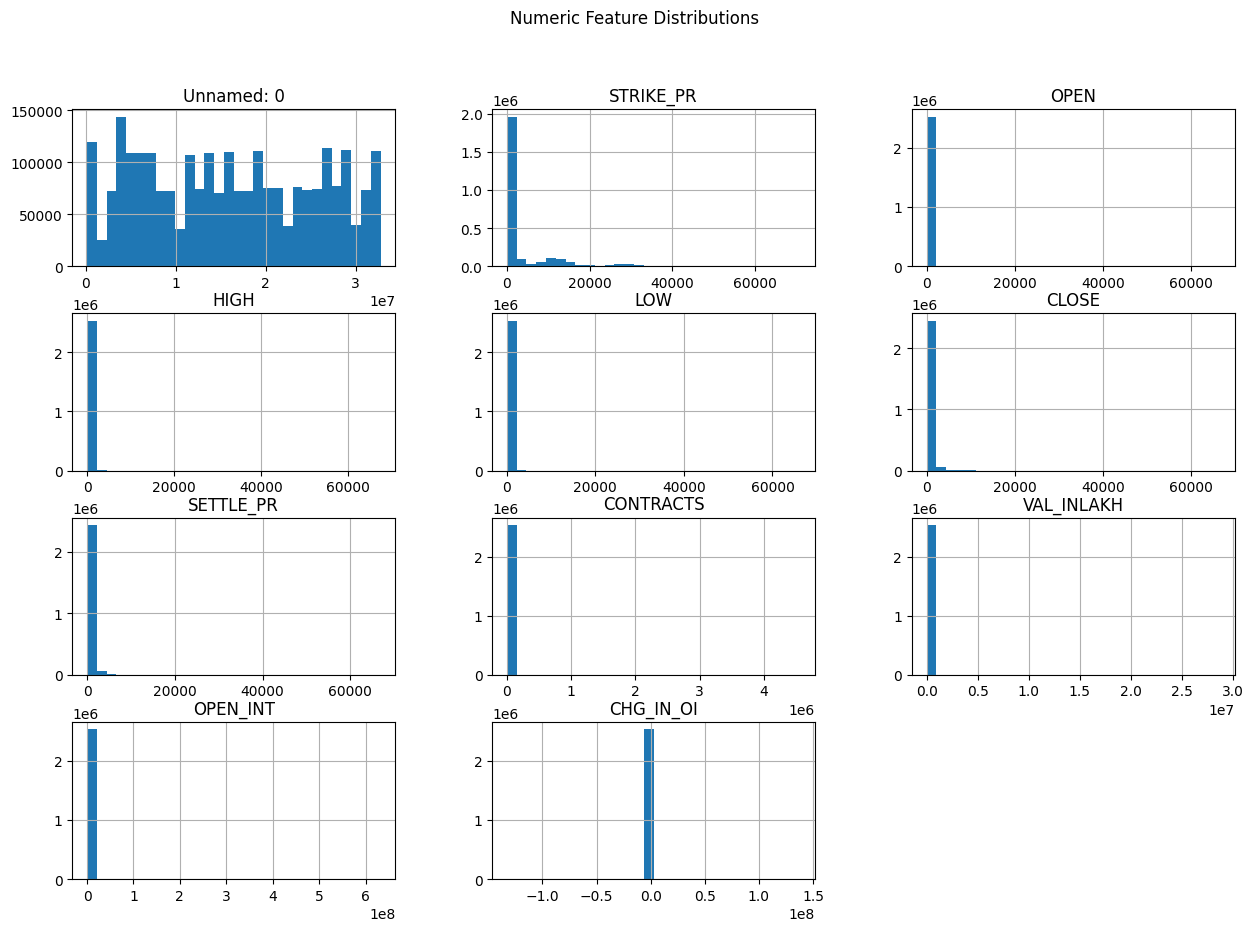

In [5]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Numeric Feature Distributions")
plt.show()

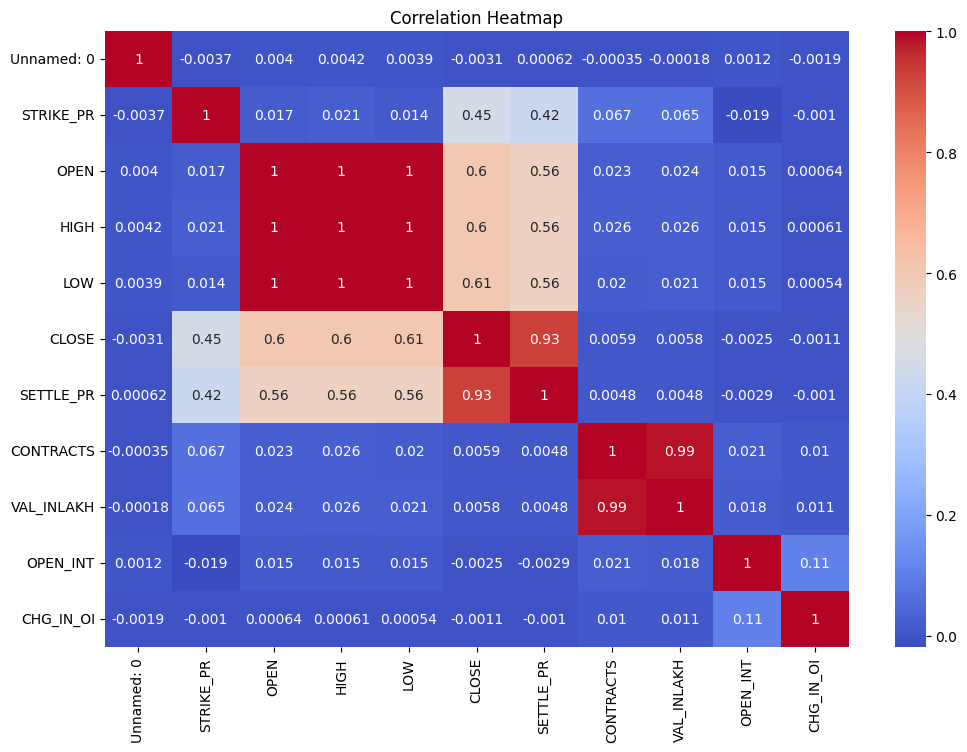

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

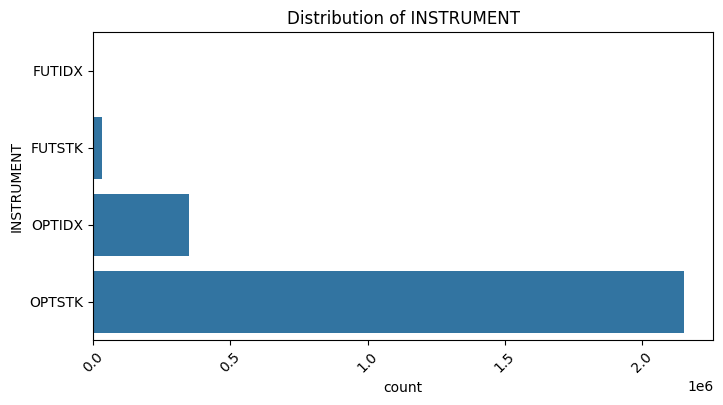

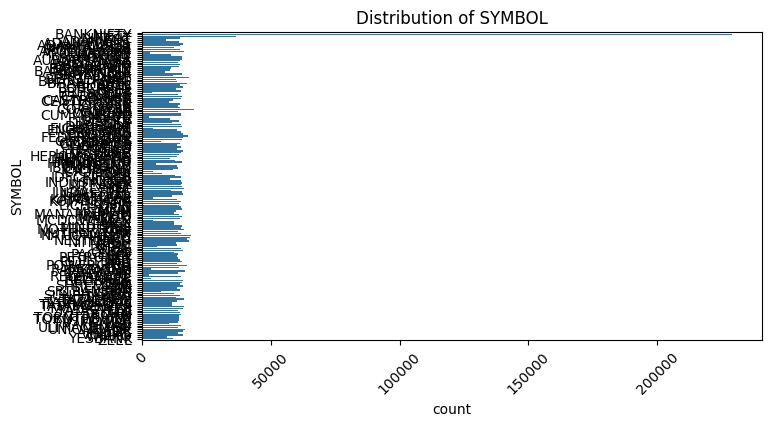

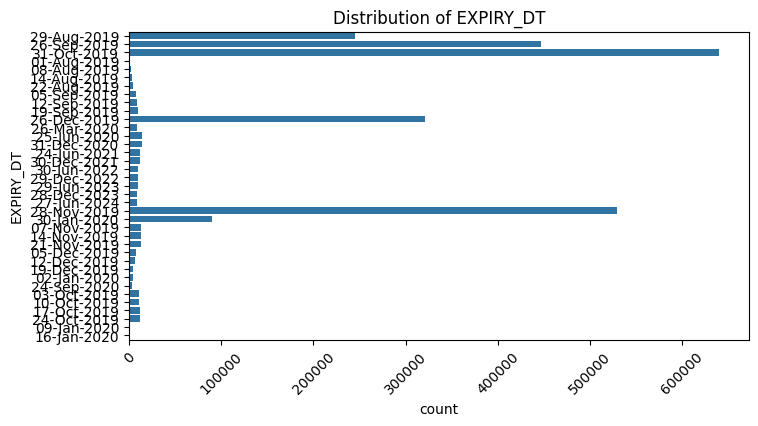

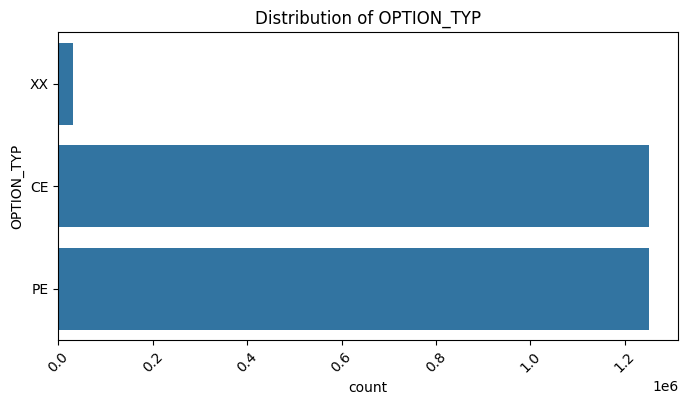

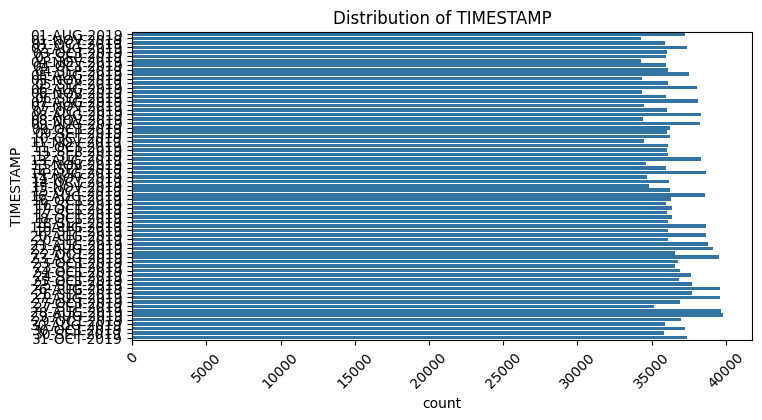

In [8]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(data[col])
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()
else:
    print("No categorical features detected.")